## 1. Price and ticksize

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import os 
import datetime

from scipy.stats import expon

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
path =  'Data/RENA.PA/'

files = sorted([i for i in os.listdir(path) if 'trades' in i])

df_list = [pd.read_csv(path + file,usecols=['ts','price','volume'],
                 parse_dates=['ts']) for file in files]


Text(0.5, 1.0, 'RENA.PA January 2017')

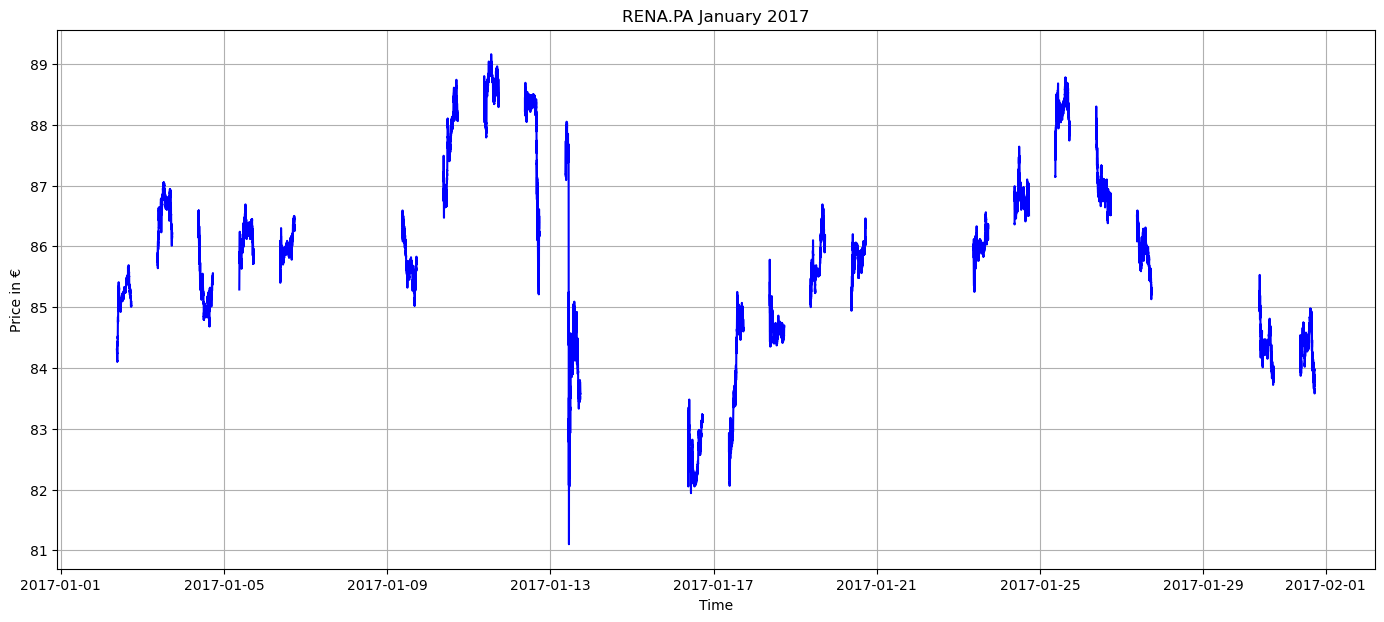

In [4]:
plt.figure(figsize=(17,7))
for df in df_list:
    data = df.drop_duplicates(subset=['ts'],keep='last')
    plt.plot(data['ts'],data['price'],color='blue')

plt.grid()
plt.xlabel('Time')
plt.ylabel('Price in €')
plt.title('RENA.PA January 2017')

#### Interpret major events

le 13 janvier 2017, le titre Renault perdait plus de 7% vendredi à la Bourse de Paris, après l'annonce de l'ouverture d'une information judiciaire en France sur les dispositifs utilisés par le constructeur automobile pour contrôler les émissions polluantes de ses voitures diesel.

C'est le jeudi 12 janvier, que s'est ouvert une information judiciaire pour "tromperie sur les qualités substantielles et les contrôles effectués avec cette circonstance que les faits ont eu pour conséquence de rendre la marchandise dangereuse pour la santé de l'homme ou de l'animal". 

[référence]

https://www.lepoint.fr/automobile/zoom-moteurs-diesel-renault-perd-plus-de-2-en-bourse-apres-l-ouverture-d-une-information-judiciaire-13-01-2017-2096877_646.php#11

https://www.rtl.fr/actu/debats-societe/renault-s-effondre-en-bourse-apres-l-ouverture-d-une-information-judiciaire-7786717439

### 1.2 The evolution of the transaction price on a subset of a few minutes

Text(0.5, 1.0, 'RENA.PA 2017/01/02 last transcation price over 10 minutes')

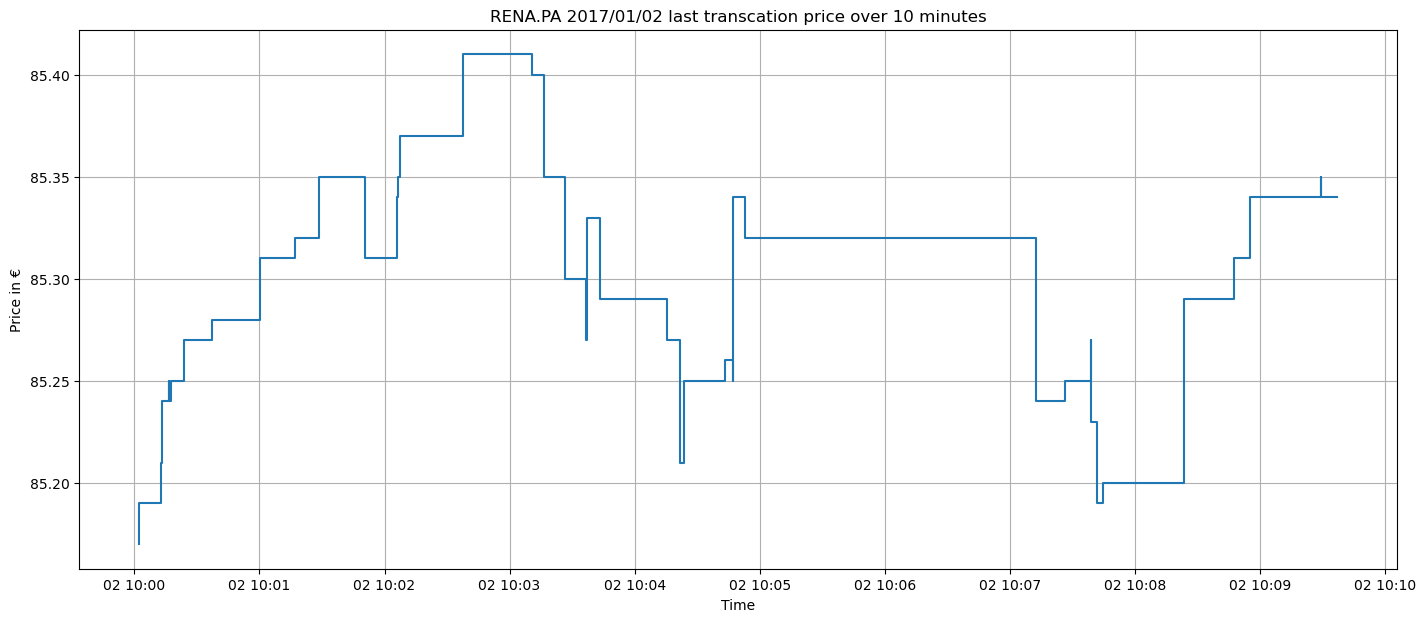

In [5]:
df = df_list[0]

start = pd.to_datetime('2017-01-02 10:00')
end = pd.to_datetime('2017-01-02 10:10')

p = df[(df['ts'] < end) &(df['ts'] > start)].drop_duplicates(subset=['ts'],keep='last')

plt.figure(figsize=(17,7))
plt.step(p['ts'],p['price'])
plt.grid()
plt.xlabel('Time')
plt.ylabel('Price in €')
plt.title('RENA.PA 2017/01/02 last transcation price over 10 minutes')

### 1.3  Ticksize

In [6]:
## min observed tick_size over days
tick_size = np.min([np.min(np.diff(sorted(set(df['price'].values)))) for df in df_list])

print(tick_size)

0.009999999999990905


###############################################################################################################

###  2. Trading activity

#### 2.1 Number of trades per day, as well as its mean on the full sample

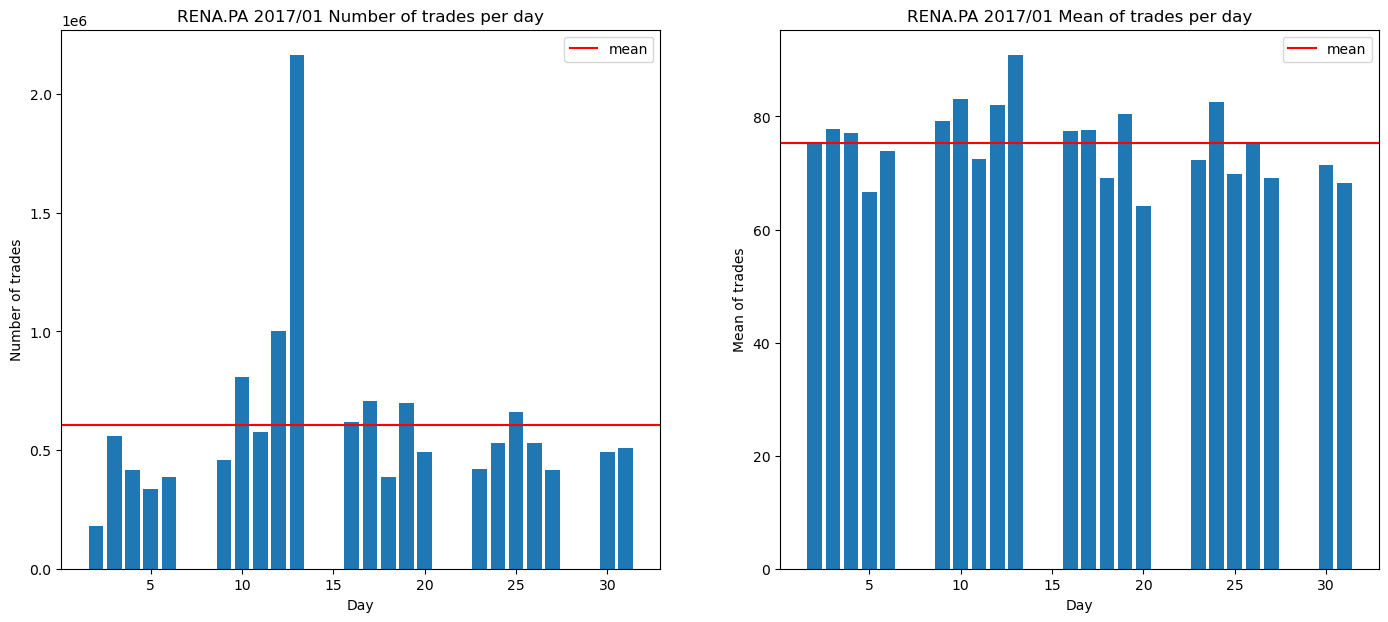

In [7]:
index = [df['ts'][0].day for df in df_list]

n_trades = [np.sum(df['volume']) for df in df_list]
n_mean = np.mean(n_trades)

m_trades = [np.mean(df['volume']) for df in df_list]
m_mean = np.mean(m_trades)

plt.figure(figsize=(17,7))
plt.subplot(121)
plt.bar(index, n_trades)
plt.axhline(n_mean,color='red',label='mean')
plt.title('RENA.PA 2017/01 Number of trades per day')
plt.xlabel('Day')
plt.ylabel('Number of trades')
plt.legend()

plt.subplot(122)
plt.bar(index, m_trades)
plt.axhline(m_mean,color='red',label='mean')
plt.title('RENA.PA 2017/01 Mean of trades per day')
plt.xlabel('Day')
plt.ylabel('Mean of trades')
plt.legend()

### 2.2 Number of trades per bins of 1 minute and  the median and mean daily profiles. 


In [8]:
dic = {}
for df in df_list:
    column = str(df['ts'][0].day) 
    df_minute = df.set_index(['ts']).resample('1min')['volume'].sum()
    df_minute.index = df_minute.index.time
    dic[column] = df_minute
    
frame_minute = pd.DataFrame(data = dic,
                         index = pd.date_range(start="9:00:00", end="17:29:00"
                                               ,freq='1min').time)
frame_minute.fillna(0,inplace=True)
frame_minute

,2,3,4,5,6,9,10,11,12,13,...,18,19,20,23,24,25,26,27,30,31
09:00:00,0.0,827,124,9,306,1812,7474,1114,868,3902,...,6566,5173,1018,8524,1149,4538,2807,75,1069,7114
09:01:00,212.0,2294,0,178,259,2274,5619,366,90,753,...,1038,723,1678,8,1201,0,290,228,61,0
09:02:00,124.0,309,6052,460,1246,932,2906,3936,447,3344,...,773,3463,4895,5798,1323,3683,711,0,3433,1078
09:03:00,11.0,773,601,276,5653,97,12847,5206,766,9750,...,2049,2043,1806,3713,552,0,1912,6865,662,517
09:04:00,0.0,242,202,4248,775,0,3183,0,2811,142,...,782,6602,506,1492,0,2526,1599,2658,422,915
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17:25:00,609.0,1411,894,1338,766,221,2405,1499,4838,3055,...,199,2343,1826,1355,1745,2616,1052,10876,1638,2183
17:26:00,1293.0,1862,950,1051,705,643,610,1253,3599,5550,...,1147,1303,1881,1085,2077,1009,3309,1818,1870,1887
17:27:00,1335.0,455,2088,1060,2549,1403,3623,906,7211,6622,...,306,2416,836,593,1380,2215,8659,7516,1210,4466
17:28:00,852.0,2233,2869,1185,578,2879,2740,3331,9813,3556,...,2670,674,1236,1103,1057,1883,2957,3353,5878,2973


Text(0.5, 1.0, 'RENA.PA 2017/01  Number of trades per bins of 1 minute')

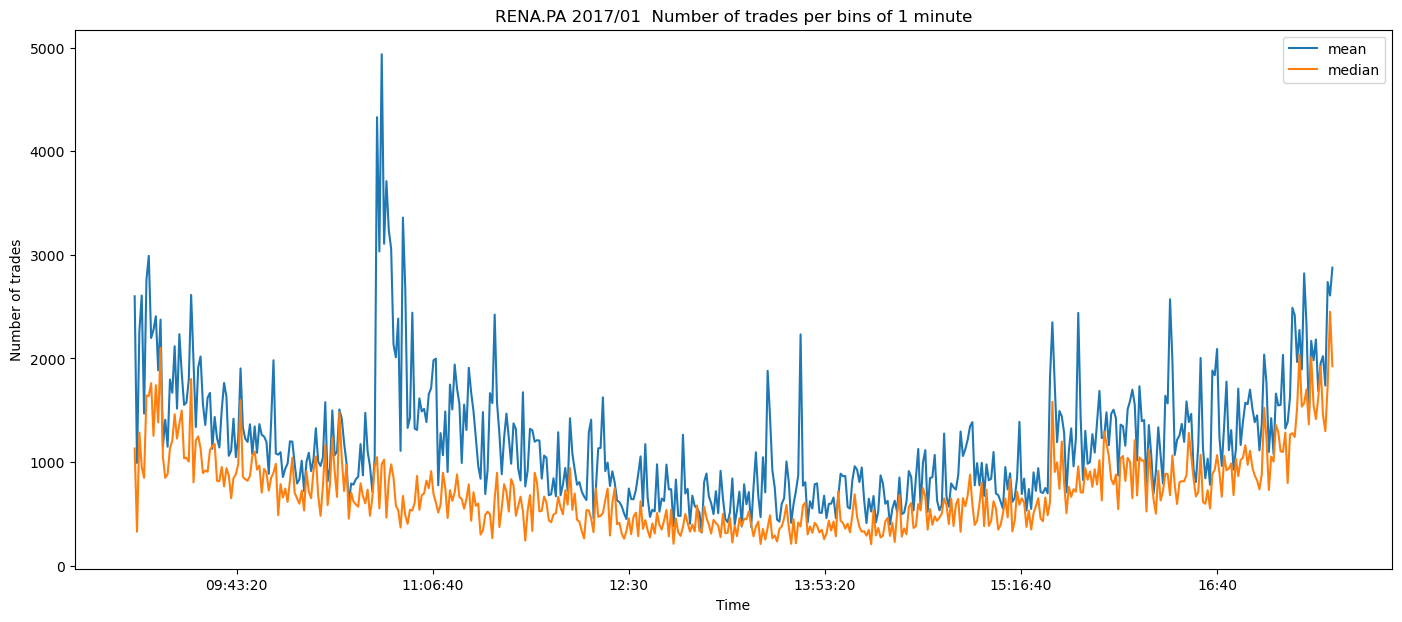

In [9]:
plt.figure(figsize=(17,7))
time = frame_minute.index
mean = frame_minute.mean(axis=1)
median = frame_minute.median(axis=1)

mean.plot(label='mean')
median.plot(label='median')
# plt.scatter(time,mean,label='mean')
# plt.scatter(time,median,label='median')

plt.legend()
plt.xlabel('Time')
plt.ylabel('Number of trades')
plt.title('RENA.PA 2017/01  Number of trades per bins of 1 minute')

### 2.3 Comment the observed profiles.

L'activité sur les marchés financiers n'est bien sûr pas constante tout au long de la journée. Il est clair qu'une forme en U est observée. (un ajustement quadratique des moindres carrés ordinaire est graphique).
l'activité de marché observée est plus importante en début et en fin de journée, et plus calme vers midi.

Un pic vers 11:00 est observé sur la courbe des moyennes (courbe bleue). Ceci peut etre expliqué par l'évenement du 13 janvier qui a causé une panique dans le marché. le profil median ne présente pas ce pic car la médiane est robuste aux outliers.

## 3. Trade durations

### 3.1 Histogram of the empirical density of the trade durations

Text(0, 0.5, 'Density')

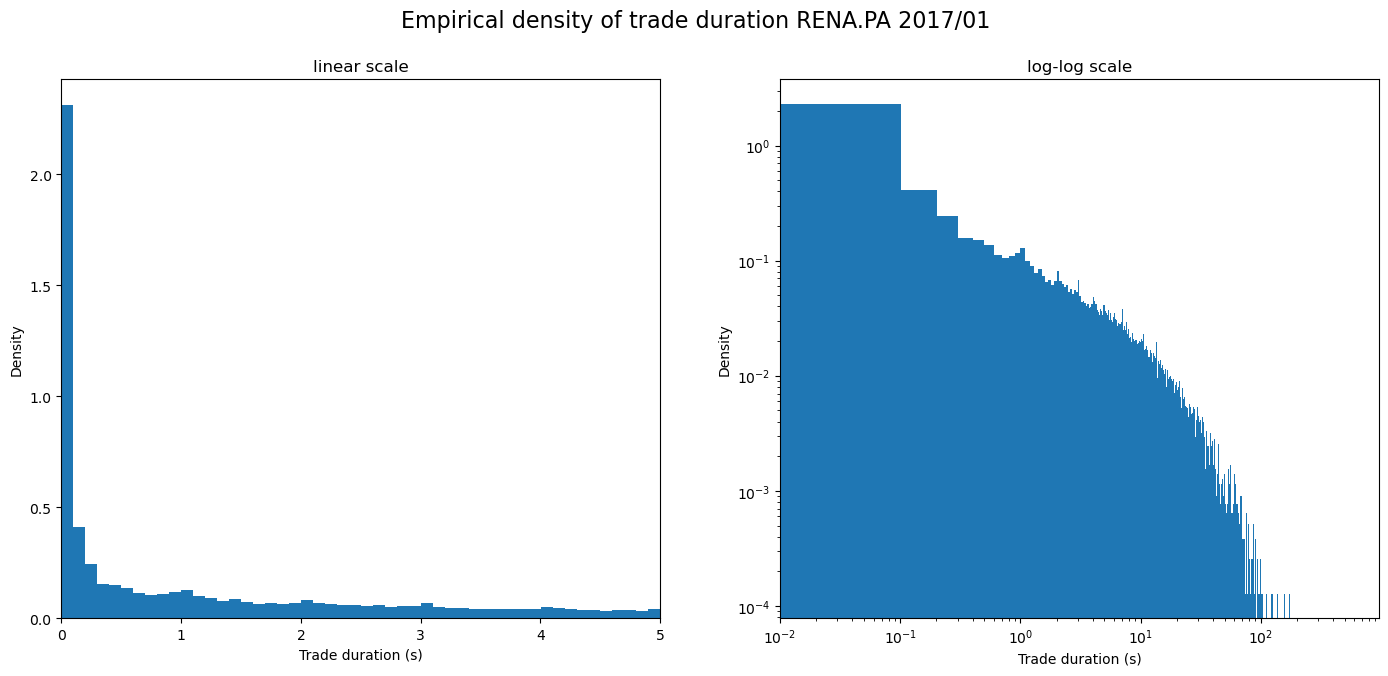

In [10]:
time_index = [df.set_index(['ts']).sort_index().index.unique().map(pd.Timestamp.timestamp) for df in df_list]

data = [np.diff(t) for t in time_index]

trade_duration = np.concatenate(data)

binwidth=0.1
bins = bins=np.arange(np.min(trade_duration), np.max(trade_duration) + binwidth, binwidth)

fig = plt.figure(figsize=(17,7))
fig.suptitle('Empirical density of trade duration RENA.PA 2017/01 ', fontsize=16)

ax1 = plt.subplot(121)

ax1.hist(trade_duration,bins=bins,density=True)
ax1.set_xlim(0,5)
ax1.set_title('linear scale')
ax1.set_xlabel('Trade duration (s)')
ax1.set_ylabel('Density')


ax2 = plt.subplot(122)
ax2.hist(trade_duration,bins=bins,density=True)
ax2.set_xscale('log')
ax2.set_xlim(10**-2)
ax2.set_yscale('log')
ax2.set_title('log-log scale')
ax2.set_xlabel('Trade duration (s)')
ax2.set_ylabel('Density')

### 3.2 Adding an exponential fit to the histograms

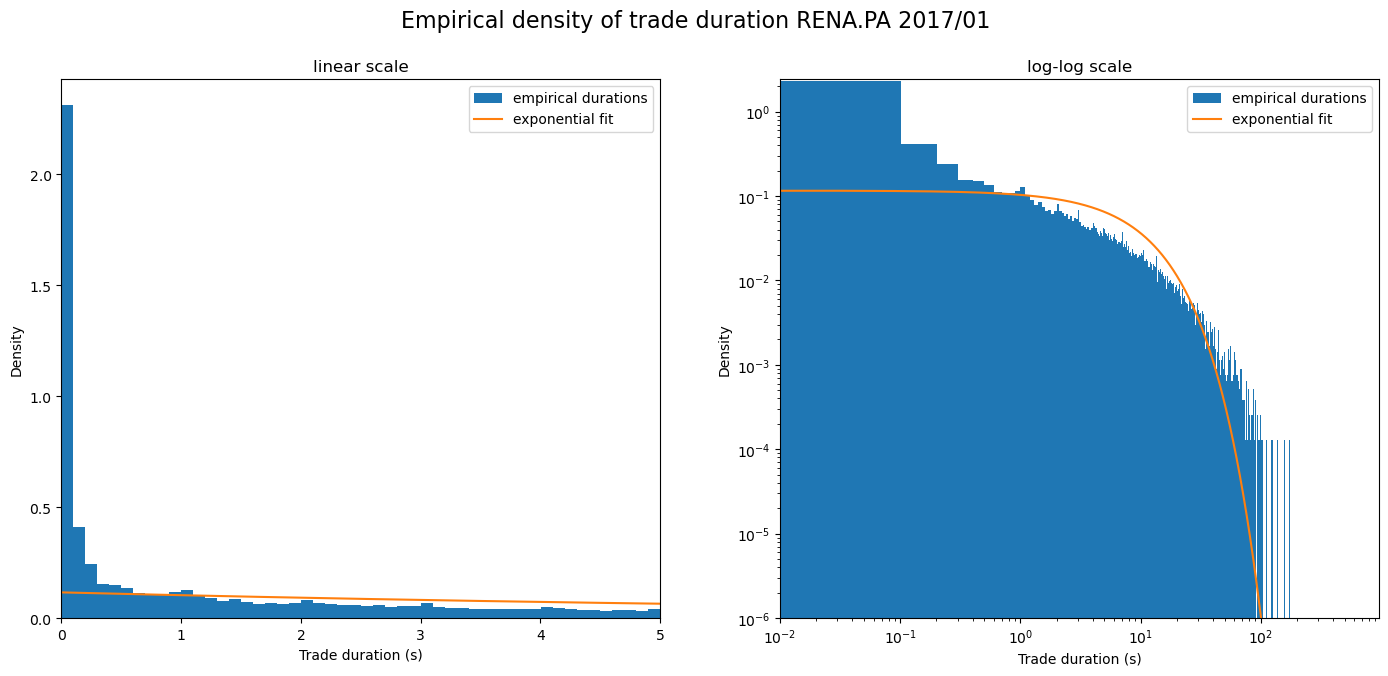

In [11]:
loc,scale = expon.fit(trade_duration)

x = np.linspace(0,300,10000)
y = expon.pdf(x,loc = 0, scale=scale)


fig = plt.figure(figsize=(17,7))
fig.suptitle('Empirical density of trade duration RENA.PA 2017/01 ', fontsize=16)

ax1 = plt.subplot(121)
ax1.hist(trade_duration,bins=bins,density=True,label='empirical durations')
ax1.plot(x, y,label='exponential fit')
ax1.set_xlim(0,5)
ax1.set_title('linear scale')
ax1.set_xlabel('Trade duration (s)')
ax1.set_ylabel('Density')
ax1.legend()


ax2 = plt.subplot(122)
ax2.hist(trade_duration,bins=bins,density=True,label='empirical durations')
ax2.plot(x, y,label='exponential fit')
ax2.set_xscale('log')
ax2.set_xlim(10**-2)
ax2.set_ylim(10**-6)
ax2.set_yscale('log')
ax2.set_title('log-log scale')
ax2.set_xlabel('Trade duration (s)')
ax2.set_ylabel('Density')
ax2.legend()

 ### 3.3 Rejecting the hypothesis that a power law is a good fit of the duration distribution

In [12]:
from scipy.stats import powerlaw, kstest


# Fit the power law distribution to the data
fit = powerlaw.fit(trade_duration)

# Calculate the KS test statistic and p-value
D, p = kstest(trade_duration, powerlaw.cdf, args=fit)

# Print the results
if p < 0.05:  # set the significance level to 0.05
    print("The data does not follow a power law.")
else:
    print("The data follows a power law.")

The data does not follow a power law.


### Weibull distributions 

Nous calculons la distribution empirique des temps entre arrivées des ordres de marché. les résultats sont représentés sur les figures en haut, à la fois à l'échelle linéaire et logarithmique.

Par un test de Kolmogorov-Smirnov, On observe que l'ajustement par une loi de puissance ne réussit pas le test avec un rique de 5% . Cependant la distribution de Weibull est potentiellement un bon candidat pour ajuster les données. Les distributions de Weibull ont été suggérées par exemple dans [1]. Politi et Scalas (2008) obtiennent également de bons ajustements avec les distrubitions q exponentielles


[Réference]

[1] -  Mauro Politi and Enrico Scalas. “Fitting the empirical distribution of intertrade durations”. In: Physica A: Statistical Mechanics and its Applications 387.8-9 (2008),pp. 2025–2034.

# 4. Trade volumes

### 4.1 Histogram of the empirical density of the trade sizes, , in both linear and log-log scale

Text(0, 0.5, 'Density')

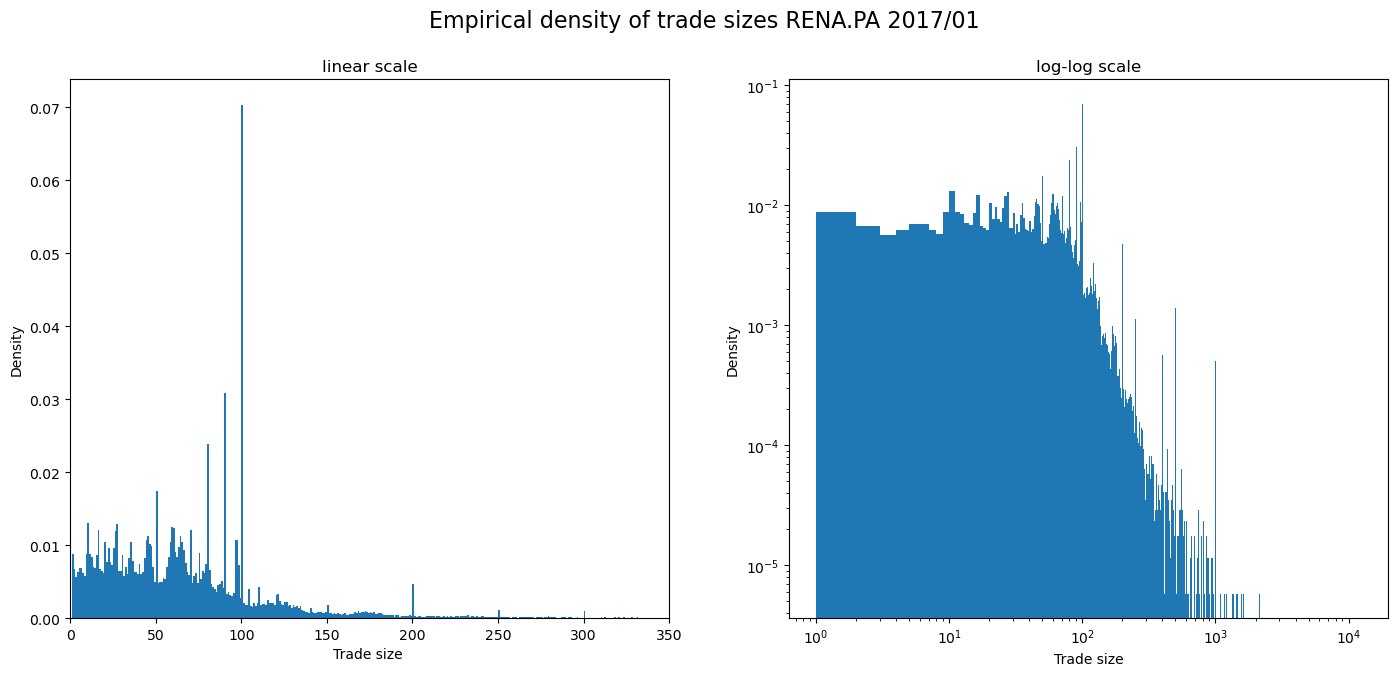

In [13]:
trade_size = np.concatenate([df['volume'].values for df in df_list])

binwidth = 1
bins=np.arange(min(trade_size), max(trade_size) + binwidth, binwidth)

fig = plt.figure(figsize=(17,7))
fig.suptitle('Empirical density of trade sizes RENA.PA 2017/01 ', fontsize=16)

ax1 = plt.subplot(121)

ax1.hist(trade_size,bins=bins,density=True)
ax1.set_xlim(0,350)
ax1.set_title('linear scale')
ax1.set_xlabel('Trade size ')
ax1.set_ylabel('Density')


ax2 = plt.subplot(122)
ax2.hist(trade_size,bins=bins,density=True)
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('log-log scale')
ax2.set_xlabel('Trade size')
ax2.set_ylabel('Density')

## 4.2 Adding an exponential fit to the log-log histogram

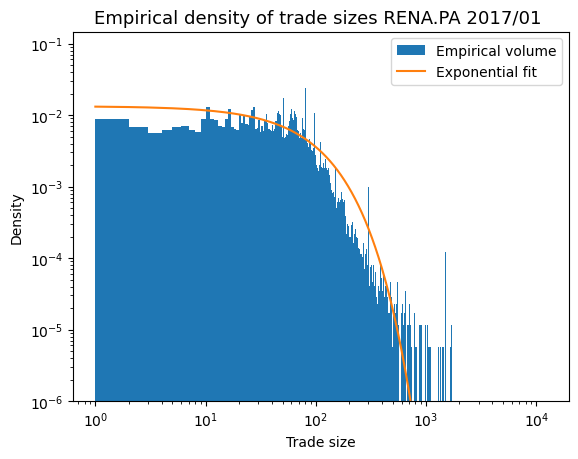

In [14]:
binwidth = 1
bins=np.arange(min(trade_size), max(trade_size) + binwidth, binwidth)

fit = expon.fit(trade_size)
x = np.linspace(1,10**3,1000)
y = expon.pdf(x,*fit)

plt.hist(trade_size,bins=bins,density=True,label='Empirical volume')
plt.plot(x,y,label='Exponential fit')
plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-6)
plt.xlabel('Trade size')
plt.ylabel('Density')
plt.title('Empirical density of trade sizes RENA.PA 2017/01 ', fontsize=13)
plt.legend()

## 4.3 Adding a power-law fit of the tail of the distribution to the log-log histogram

In [15]:
import powerlaw

Calculating best minimal value for power law fit
2.923594778893313%


Text(700, 0.001, 'tail exponents = 2.92')

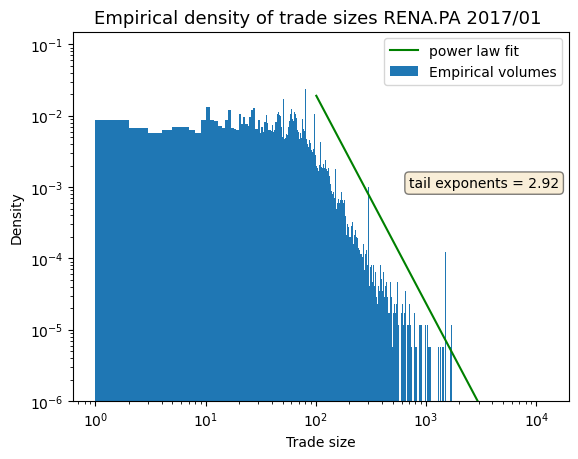

In [16]:
results = powerlaw.Fit(trade_size)
print(results.power_law.alpha)

binwidth = 1
bins=np.arange(min(trade_size), max(trade_size) + binwidth, binwidth)


results.power_law.plot_pdf(color='g',label='power law fit')

plt.hist(trade_size,bins=bins,density=True,label='Empirical volumes')

plt.xscale('log')
plt.yscale('log')
plt.ylim(10**-6)
plt.xlabel('Trade size')
plt.ylabel('Density')
plt.title('Empirical density of trade sizes RENA.PA 2017/01 ', fontsize=13)
plt.legend()

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = f'tail exponents = {round(results.power_law.alpha,2)}'

# place a text box in upper left in axes coords
plt.text(7*10**2, 10**-3, textstr, bbox=props)

### 4.4 Several studies find a tail exponents around 2.5 for transactions volumes

Plusieurs études empiriques suggèrent une loi de puissance pour modéliser la distribution des volumes des ordres de marché.
Gopikrishnan et al. (2000) et Maslov et Mills (2001) observe une décroissance de la loi de puissance avec un exposant entre 2,3 et 2,7 pour les ordres de marché et 2,0 pour les ordres limite. Dans notre cas, on trouve un un exposant 2.92 qui est relativement un peu plus grand.

Challet et Stinchcombe (2001) déclarent que les ordres ont tendance à avoir volume "arrondi", càd que les volumes prennent souvent des valeurs entières multiples de 10 ou 50 ou 100. Ce fait est présent dans notre cas. en effet on observe des pics aux  valeurs "arrondis".

[Réferences]

- Gopikrishnan, P., Plerou, V., Gabaix, X. and Stanley, H.E., Statistical properties of share volume traded in financial markets. Phys. Rev. E, 2000a, 62, 4493–4496.

- Gopikrishnan, P., Plerou, V., Gabaix, X. and Stanley, H.E., Statistical properties of share volume traded in financial markets. Phys. Rev. E, 2000b, 62, R4493–R4496.

- Maslov, S. and Mills, M., Price fluctuations from the order book perspective – Empirical facts and a simple model. Physica A, 2001, 299, 234–246.

- Challet, D. and Stinchcombe, R., Analyzing and modeling 1+1d markets. Physica A, 2001, 300, 285–299.



# 5. High-frequency log-returns and trading activity


### 5.1  Complementary cumulative empirical distribution function of the absolute log-returns sampled every 1, 5 and 15 minutes.

In [17]:
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.stats import norm 

Text(0, 0.5, '$\\mathbb{P} (X>x)$')

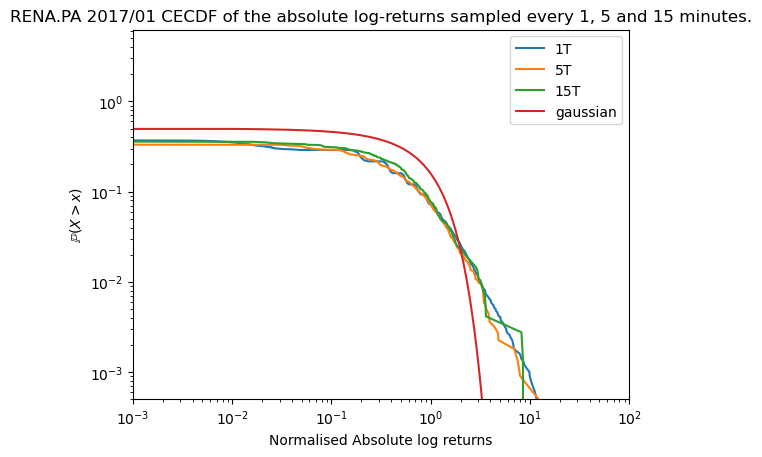

In [18]:
dic = dict()
freq_sample = ['1T','5T','15T']

for freq in freq_sample:
    data = [df.set_index('ts').resample(freq).last()  for df in df_list]
    
    rend = np.concatenate([np.log(df['price']).diff().dropna() for df in data])
    dic[freq] = (np.abs(rend) - np.mean(np.abs(rend)))/np.std(np.abs(rend))


for key,abs_rend in dic.items():
    ecdf = ECDF(abs_rend)
    
    plt.plot(ecdf.x,1-ecdf.y,label=key)




x = np.linspace(0,100,10000)
y = norm.cdf(x)


plt.plot(x,1-y,label='gaussian')
plt.legend()

plt.yscale("log")
plt.xscale('log')
plt.ylim(5*10**-4)
plt.xlim(10**-3,10**2)
plt.title('RENA.PA 2017/01 CECDF of the absolute log-returns sampled every 1, 5 and 15 minutes.')
plt.xlabel('Normalised Absolute log returns')
plt.ylabel(r'$\mathbb{P} (X>x)$')

### Comment

Si la fonction de survie empirique décroît plus lentement qu'une droite alors elle est convexe et on est en présence de queues lourdes ce qui est le cas pour les données HF.

D'après le graphe, on observe qu'une distribution gaussienne est un mauvais choix pour décrire la distribution des rendements.

Il a été observé dans [1] qu'à mesure que l'on augmente l'échelle de temps sur laquelle les rendements
sont calculés, la propriété de queue grasse devient moins prononcée et la distribution se rapproche de la distribution gaussienne forme. on ne peut pas observer ce fait dans ce graphe car on n'utilise pas des fréquences pas assez grandes pour le resampling.

[Reference]

[1] - Chakraborti, A., Toke, I. M., Patriarca, M., & Abergel, F. (2011). Econophysics review: I. Empirical facts. Quantitative Finance, 11(7), 991-1012.

## 5.2 Variance of the log-returns every T minutes and the mean number of trades every T minutes, as a function of T

In [19]:
from scipy.stats import chi2

On calcule l'intervalle de confiance de la variance avec la méthode suivante :

C.I.$: \frac{(n-1) s^2}{\chi_{\frac{\alpha}{2}, d f}^2} \leq \sigma^2 \leq \frac{(n-1) s^2}{\chi_{1-\frac{\alpha}{2}, d f}^2}$
where
$\begin{array}{ll}\sigma^2 & : \text { population variance } \\ s^2 & : \text { sample variance } \\ \alpha & : \text { significance level } \\ n & : \text { number of samples } \\ d f & : \text { degrees of freedom. } \\ \chi^2 & : \text { chi-squared statistic.} \end{array}$

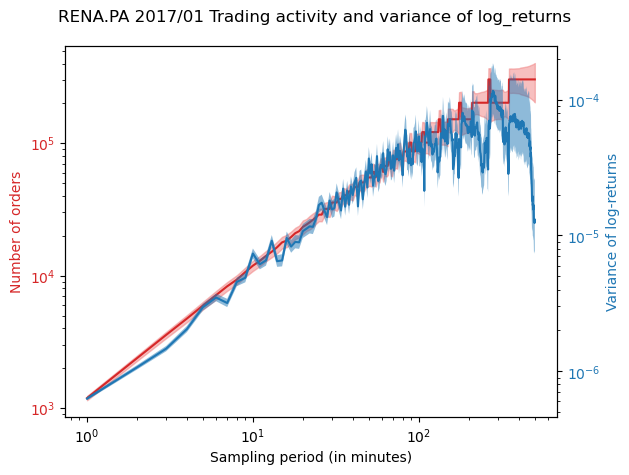

In [20]:
alpha = 0.95
sampling_period = list(range(1,502,1))
variance = []
mean_trades = []


for f in sampling_period:
    
    trades = np.concatenate([df.set_index('ts')['volume'].resample(str(f)+'T').sum()  for df in df_list[0:]])
    price = np.concatenate([np.log(df.set_index('ts')['price'].resample(str(f)+'T').last()).diff().dropna()
                               for df in df_list[0:]])
    
    m_trades = np.mean(trades)
    
    v = np.var(price,ddof=1)
    
    
    
    ## Confidence interval
    q_alpha = norm.ppf(1 - (1-alpha)/2)
    borne = q_alpha*np.std(trades)/np.sqrt(len(trades))   
    conf_min = m_trades - borne
    conf_max = m_trades + borne
    
    n = len(price) # sample sizes
    df = n - 1                 # degrees of freedom
    v_min = (n - 1) * v / chi2.ppf(1 - (1-alpha)/2, df)
    
    v_max = (n - 1) * v / chi2.ppf( (1-alpha)/2, df)
    
    
    mean_trades.append([m_trades,conf_min,conf_max])
    variance.append([v,v_min,v_max])
    
mean_trades = np.array(mean_trades)
variance = np.array(variance)
    
## Figure
fig, ax1 = plt.subplots()
fig.suptitle('RENA.PA 2017/01 Trading activity and variance of log_returns', fontsize=12)

color = 'tab:red'
ax1.set_xlabel('Sampling period (in minutes)')
ax1.set_ylabel('Number of orders', color=color)
ax1.plot(sampling_period,mean_trades[:,0], color=color)
ax1.fill_between(sampling_period, mean_trades[:,1], mean_trades[:,2], color="lightcoral",
                 alpha=0.5, label="IC " + str(0.95 * 100) + "%")

ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2 = ax1.twinx()  

color = 'tab:blue'
ax2.set_ylabel('Variance of log-returns', color=color)  
ax2.plot(sampling_period,variance[:,0], color=color)
ax2.fill_between(sampling_period, variance[:,1], variance[:,2],
                 alpha=0.5, label="IC " + str(0.95 * 100) + "%")

ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xscale('log')
ax2.set_yscale('log')
fig.tight_layout()


D'après [1], la variance $V_{\Delta t}$ peut correspondre au nombre de transactions $N_{\Delta t}$ pendant l'intervalle de temps $\Delta t$ : $V_{\Delta t}=\xi N_{\Delta t}$, où $\xi$ est un coefficient. Chaque transaction peut modifier le prix à la hausse ou à la baisse, de sorte que la distribution de probabilité $P_N(x)$ après $N$ transactions serait gaussienne :

$$
P_N(x)=\frac{e^{-x^2 / 2 \xi N}}{\sqrt{2 \pi \xi N}}
$$

Il découle de cette équation que $\left\langle x^2\right\rangle_N=\xi N$, où $\left\langle x^2\right\rangle_N$ est le second moment de $x$ après $N$ transactions. Il est également naturel de s'attendre à ce que le nombre moyen de transactions $\langle N\rangle_{\Delta t}$ pendant l'intervalle de temps $\Delta t$ soit proportionnel à $\Delta t$ avec un certain coefficient $\eta$. Nous nous attendons donc à ce que

$$
\left\langle x^2\right\rangle_N=\xi N,\langle N\rangle_{\Delta t}=\eta \Delta t,\left\langle x^2\right\rangle_{\Delta t}=\theta \Delta t, \theta=\xi \eta
$$

Le graphe obtenu en haut confirme ces dernières équations qui ont été formulées par [1]

[Réference]

- Silva, A. C., & Yakovenko, V. M. (2007). Stochastic volatility of financial markets as the fluctuating rate of trading: An empirical study. Physica A: Statistical Mechanics and its Applications, 382(1), 278-285.

### 5.3 log-returns in event time are Gaussian

Pour une simple marche aléatoire multiplicative (géométrique), la distribution de probabilité est gaussienne : $P_{\Delta t}(x) \propto \exp \left(-x^2 / 2 v \Delta t\right)$, où $v=\sigma^2$ est la variance, et $\sigma$ est la volatilité. Cependant, la distribution de probabilité des rendements logarithmiques observée empiriquement n'est pas gaussienne. Il est bien connu que la distribution a des queues en forme de loi de puissance pour les grands $x$.

Afin d'expliquer le caractère non gaussien de la distribution des rendements, Silva, A. C., & Yakovenko (2007) proposent  un modèle avec volatilité stochastique. Si la variance $v_t$ change dans le temps, alors $v \Delta t$ dans la distribution gaussienne doit être remplacé par la variance intégrée $V_{\Delta t}=\int_{t_1}^{t_2} v_t d t$. Si la variance est stochastique, il faut faire la moyenne de la distribution de probabilité $Q_{\Delta t}(V)$ de la variance intégrée $V$ pour l'intervalle de temps $\Delta t$ :

$$
P_{\Delta t}(x)=\int_0^{\infty} d V \frac{e^{-x^2 / 2 V}}{\sqrt{2 \pi V}} Q_{\Delta t}(V) .
$$

Cette représentation est appelée subordination. Dans cette approche, le caractère non gaussien de $P_{\Delta t}(x)$ résulte d'une distribution non triviale $Q_{\Delta t}(V)$. Dans les modèles à volatilité stochastique, les variables $v$ ou $V$ sont traitées comme des variables stochastiques cachées. la variance intégrée $V_{\Delta t}$ peut correspondre au nombre de transactions $N_{\Delta t}$ pendant l'intervalle de temps $\Delta t$ : $V_{\Delta t}=\xi N_{\Delta t}$, où $\xi$ est un coefficient. Chaque transaction peut modifier le prix à la hausse ou à la baisse, de sorte que la distribution de probabilité $P_N(x)$ après $N$ transactions serait gaussienne :
$$
P_N(x)=\frac{e^{-x^2 / 2 \xi N}}{\sqrt{2 \pi \xi N}}
$$

En utlisant le temps evenementiel, càd on augmente le temps d'une unité à chaque fois qu'un ordre est soumis au marché. les log rendements prennent une distribution plus régulière.

[réference]
- Silva, A. C., & Yakovenko, V. M. (2007). Stochastic volatility of financial markets as the fluctuating rate of trading: An empirical study. Physica A: Statistical Mechanics and its Applications, 382(1), 278-285.